In [19]:
#preprocessing SANBS data

import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns



In [20]:
# load merged dataset (donation_donor, deferrals, collec_sites)

df=pd.read_csv("../1_data/private/VitalantData.csv")
print(df.columns)
pd.set_option('display.max_columns', 48)
df.head()


/tmp/ipykernel_670731/3645691314.py:3: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("../1_data/private/VitalantData.csv")


Index(['DON_DATE_KEY', 'DONOR_KEY', 'DONOR_NUMBER', 'DONATION_NUMBER',
       'ACTIVE_DONOR_TYPE', 'SITE_KEY', 'COLLECTION_SITE_KEY',
       'DONATION_VOLUME_DRAWN', 'DRIVE_ID', 'PHLEB_START_TIME_KEY',
       'PHLEB_STOP_TIME_KEY', 'PHLEBOTOMY_CODE', 'PHLEBOTOMY_DESC',
       'PHLEBOTOMY_STATUS', 'DONATION_PROCEDURE_TYPE', 'PHLEBOTOMY_GROUP',
       'DONATION_TYPE', 'DONATION_BAG_DESCRIPTION', 'DONOR_GENDER',
       'DONOR_ABORH', 'DONOR_ETHNICITY_DESC', 'RACE_ETHNICITY',
       'RACE_DESCRIPTION', 'DONOR_COUNTRY_OF_BIRTH', 'DONOR_EDUCATION_DESC',
       'DONOR_WEIGHT', 'DONOR_HEIGHT', 'DONOR_ZIPCODE',
       'DONOR_AGE_AT_DONATION', 'COLLECTION_FIXED_LOCATION',
       'COLLECTION_SITE_VALID_FLAG', 'BECS_ID', 'DRIVE_SETUP_TYPE',
       'DRIVE_TYPE_FIXED_MOBILE', 'DEFERRAL_EVENT', 'DEFERRAL_INFORMATION',
       'DEFERRAL_CREATE_DATE', 'DEFERRAL_START_DATE', 'DEFERRAL_STOP_DATE',
       'DEF_INVALDATION_DATE', 'DEFERRAL', 'DEFERRAL_DESCRIPTION',
       'DEFERRAL_VALID_CODE', 'DEFERRAL_DU

,DON_DATE_KEY,DONOR_KEY,DONOR_NUMBER,DONATION_NUMBER,ACTIVE_DONOR_TYPE,SITE_KEY,COLLECTION_SITE_KEY,DONATION_VOLUME_DRAWN,DRIVE_ID,PHLEB_START_TIME_KEY,PHLEB_STOP_TIME_KEY,PHLEBOTOMY_CODE,PHLEBOTOMY_DESC,PHLEBOTOMY_STATUS,DONATION_PROCEDURE_TYPE,PHLEBOTOMY_GROUP,DONATION_TYPE,DONATION_BAG_DESCRIPTION,DONOR_GENDER,DONOR_ABORH,DONOR_ETHNICITY_DESC,RACE_ETHNICITY,RACE_DESCRIPTION,DONOR_COUNTRY_OF_BIRTH,DONOR_EDUCATION_DESC,DONOR_WEIGHT,DONOR_HEIGHT,DONOR_ZIPCODE,DONOR_AGE_AT_DONATION,COLLECTION_FIXED_LOCATION,COLLECTION_SITE_VALID_FLAG,BECS_ID,DRIVE_SETUP_TYPE,DRIVE_TYPE_FIXED_MOBILE,DEFERRAL_EVENT,DEFERRAL_INFORMATION,DEFERRAL_CREATE_DATE,DEFERRAL_START_DATE,DEFERRAL_STOP_DATE,DEF_INVALDATION_DATE,DEFERRAL,DEFERRAL_DESCRIPTION,DEFERRAL_VALID_CODE,DEFERRAL_DURATION,DURATION_MODIF_TYPE,ALLOW_DISTRIBUTION,DEFERRAL_GROUP
0,20130625.0,15057895.0,82X912T,W28861300166600F,Active,3003.0,62130.0,NaN,NaN,18:58:01,19:10:01,W,WHOLE BLOOD,Successful Phlebotomy,Other,Whole Blood,Allogeneic,Historical Triple Bag,M,O +,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),BACHELOR'S DEGREE,278.0,74.0,606,56.0,Yes,Y,VTL,Fixed,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20140525.0,840652.0,5006735,W04221402205100P,First Time,51.0,383.0,500.0,612.0,17:04:01,17:14:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CP2D: Triple RBC Filter,M,O +,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),SOME COLLEGE OR TECHNICAL SCHOOL,175.0,69.0,890,63.0,No,Y,VTL,Mobile Setup,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20141018.0,792640.0,2109508,W04221404264200Q,Active,51.0,376.0,452.0,600.0,10:24:01,12:14:01,A,APHERESIS (PLT/GRAN),Successful Phlebotomy,Automated,Platelet,Allogeneic,TRIMA APHERESIS PLATELETS,M,AB+,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),SOME COLLEGE OR TECHNICAL SCHOOL,205.0,68.0,890,36.0,Yes,Y,VTL,Fixed,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20140726.0,7079135.0,5024441,W04221402021200I,First Time,51.0,380.0,500.0,602.0,12:28:01,12:49:01,U,UNSUCCESSFUL DRAW,Unsuccessful Phlebotomy,WB,Whole Blood,Allogeneic,CP2D: Triple RBC Filter,M,O +,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),HIGH SCHOOL GRAD-DIPLOMA OR EQUIV,190.0,70.0,891,25.0,Yes,Y,VTL,Fixed,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20140519.0,6126680.0,4186033,W042214021267009,Active,51.0,383.0,440.0,612.0,11:31:01,12:05:01,R,2RBC - ALLOGENEIC,Successful Phlebotomy,Automated,2RBC,Allogeneic,HAEMONETICS APHERESIS 2RBC FILTERED,M,O +,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),"9th,10th,11th,12th GRADE-NO DIPLOMA",190.0,69.0,864,18.0,No,Y,VTL,Mobile Setup,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#add a column OUTCOME_TYPE that indicates hgb deferal, other deferral or completed donation to indicate deferral type

df['OUTCOME_TYPE'] = np.where(df.DEFERRAL_GROUP.notnull(), None, 'completed')
df.loc[(df['DEFERRAL_GROUP'] == "Low Hemoglobin") | (df["DEFERRAL_GROUP"]=='Blood Loss'), 'OUTCOME_TYPE'] = 'low hgb'
#df.loc[(!(df["DEFERRAL_GROUP"].isna)) & (df["DEFERRAL_GROUP"]!='Blood Loss') & (df['DEFERRAL_GROUP'] != "Low Hemoglobin"), 'OUTCOME_TYPE'] = 'other deferral''
#df.loc[(df['PHLEBOTOMY_STATUS'] != "Successful Phlebotomy") & !(df["DEFERRAL_GROUP"].isnull()), 'OUTCOME_TYPE'] = 'other deferral'
df['OUTCOME_TYPE'].fillna("other deferral", inplace=True)

df.drop(df[df['DON_DATE_KEY'].isna()].index, inplace=True) #remove any missing visit dates

df["Visit_Date"] = pd.to_datetime(df['DON_DATE_KEY'], format='%Y%m%d') #convert to datetime object

df.sort_values(by=['DONOR_KEY', 'DONOR_NUMBER', 'Visit_Date'], axis = 0, inplace=True)

df['OUTCOME_TYPE'].value_counts()

completed         15455502
low hgb             318589
other deferral      132660
Name: OUTCOME_TYPE, dtype: int64

In [22]:
print(len(df.loc[df['OUTCOME_TYPE']=='low hgb'])) # number of deferrals
print(len(df))#total observations


318589
15906751


In [23]:
# donor history
#merge with don hist dataset
df['DonorID']=df['DONOR_KEY']
df['Visit_Date']=pd.to_datetime(df['Visit_Date']).dt.strftime('%Y-%m-%dT%H:%M:%SZ') #covert to ISO -#2019-03-26T00:00:00Z

don_hist=pd.read_csv("../1_data/private/vitalant_intermediate_to_del6.csv")
df=pd.merge(df, don_hist[['DONATION_NUMBER', 'DonorID', 'Visit_Date','cum_lifetime_donations','unit_rbc_loss','time_to_fu',
                          'rbc_loss_last_12_months', 'rbc_loss_last_24_months','days_since_last_rbc_loss', 
                          'days_since_last_drbc_loss']], how='left', on=["DonorID","DONATION_NUMBER", "Visit_Date"])

df.head()

/tmp/ipykernel_670731/3991560505.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  don_hist=pd.read_csv("../1_data/private/vitalant_intermediate_to_del6.csv")


,DON_DATE_KEY,DONOR_KEY,DONOR_NUMBER,DONATION_NUMBER,ACTIVE_DONOR_TYPE,SITE_KEY,COLLECTION_SITE_KEY,DONATION_VOLUME_DRAWN,DRIVE_ID,PHLEB_START_TIME_KEY,PHLEB_STOP_TIME_KEY,PHLEBOTOMY_CODE,PHLEBOTOMY_DESC,PHLEBOTOMY_STATUS,DONATION_PROCEDURE_TYPE,PHLEBOTOMY_GROUP,DONATION_TYPE,DONATION_BAG_DESCRIPTION,DONOR_GENDER,DONOR_ABORH,DONOR_ETHNICITY_DESC,RACE_ETHNICITY,RACE_DESCRIPTION,DONOR_COUNTRY_OF_BIRTH,...,DRIVE_TYPE_FIXED_MOBILE,DEFERRAL_EVENT,DEFERRAL_INFORMATION,DEFERRAL_CREATE_DATE,DEFERRAL_START_DATE,DEFERRAL_STOP_DATE,DEF_INVALDATION_DATE,DEFERRAL,DEFERRAL_DESCRIPTION,DEFERRAL_VALID_CODE,DEFERRAL_DURATION,DURATION_MODIF_TYPE,ALLOW_DISTRIBUTION,DEFERRAL_GROUP,OUTCOME_TYPE,Visit_Date,DonorID,cum_lifetime_donations,unit_rbc_loss,time_to_fu,rbc_loss_last_12_months,rbc_loss_last_24_months,days_since_last_rbc_loss,days_since_last_drbc_loss
0,20180118.0,0.0,UNKNOWN,W04231800976600U,Reengaged,52.0,416.0,500.0,631.0,13:43:01,13:51:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CP2D: Triple RBC Filter,UNKNOWN,UNKNOWN,UNKNOWN,Missing/Unknown/Refused,UNKNOWN,UNKNOWN,...,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2018-01-18T00:00:00Z,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20180328.0,0.0,UNKNOWN,W04231801512400J,Active,52.0,416.0,525.0,631.0,12:31:01,12:39:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CP2D: Triple RBC Filter,UNKNOWN,UNKNOWN,UNKNOWN,Missing/Unknown/Refused,UNKNOWN,UNKNOWN,...,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2018-03-28T00:00:00Z,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20180817.0,0.0,UNKNOWN,W04231802056700D,Active,52.0,393.0,525.0,638.0,09:06:01,09:13:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CP2D: Triple RBC Filter,UNKNOWN,UNKNOWN,UNKNOWN,Missing/Unknown/Refused,UNKNOWN,UNKNOWN,...,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2018-08-17T00:00:00Z,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20181110.0,0.0,UNKNOWN,W14281804677700M,First Time,114.0,571.0,500.0,100.0,10:24:01,10:32:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CP2D: Triple RBC Filter,UNKNOWN,UNKNOWN,UNKNOWN,Missing/Unknown/Refused,UNKNOWN,UNKNOWN,...,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2018-11-10T00:00:00Z,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20181212.0,0.0,UNKNOWN,W04231802705000X,Active,52.0,393.0,525.0,639.0,11:13:01,11:22:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CP2D: Triple RBC Filter,UNKNOWN,UNKNOWN,UNKNOWN,Missing/Unknown/Refused,UNKNOWN,UNKNOWN,...,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2018-12-12T00:00:00Z,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#drop unknown donor number or donor key 0
df.drop(df[(df['DONOR_NUMBER'] == 'UNKNOWN')].index, inplace=True)


In [27]:
# generate some cross tables
#df['DEFERRAL_GROUP'].fillna(value='missing', inplace=True)
#df.head(25)
#pd.set_option('display.max_rows', 1500)
#pd.crosstab(index=df['DONATION_BAG_DESCRIPTION'], columns=df['DEFERRAL_GROUP'], dropna=False)
#df.columns

Index(['DON_DATE_KEY', 'DONOR_KEY', 'DONOR_NUMBER', 'DONATION_NUMBER',
       'ACTIVE_DONOR_TYPE', 'SITE_KEY', 'COLLECTION_SITE_KEY',
       'DONATION_VOLUME_DRAWN', 'DRIVE_ID', 'PHLEB_START_TIME_KEY',
       'PHLEB_STOP_TIME_KEY', 'PHLEBOTOMY_CODE', 'PHLEBOTOMY_DESC',
       'PHLEBOTOMY_STATUS', 'DONATION_PROCEDURE_TYPE', 'PHLEBOTOMY_GROUP',
       'DONATION_TYPE', 'DONATION_BAG_DESCRIPTION', 'DONOR_GENDER',
       'DONOR_ABORH', 'DONOR_ETHNICITY_DESC', 'RACE_ETHNICITY',
       'RACE_DESCRIPTION', 'DONOR_COUNTRY_OF_BIRTH', 'DONOR_EDUCATION_DESC',
       'DONOR_WEIGHT', 'DONOR_HEIGHT', 'DONOR_ZIPCODE',
       'DONOR_AGE_AT_DONATION', 'COLLECTION_FIXED_LOCATION',
       'COLLECTION_SITE_VALID_FLAG', 'BECS_ID', 'DRIVE_SETUP_TYPE',
       'DRIVE_TYPE_FIXED_MOBILE', 'DEFERRAL_EVENT', 'DEFERRAL_INFORMATION',
       'DEFERRAL_CREATE_DATE', 'DEFERRAL_START_DATE', 'DEFERRAL_STOP_DATE',
       'DEF_INVALDATION_DATE', 'DEFERRAL', 'DEFERRAL_DESCRIPTION',
       'DEFERRAL_VALID_CODE', 'DEFERRAL_DU

In [28]:
#add censored column (indicates whether row is right censored) 0-censored, 1-notcensored
df['CENSORED']=np.where(df['DONOR_KEY'] == df['DONOR_KEY'].shift(-1), 1, 0)

#add time_to_return column (time between visits)
#if return exists -> difference between visit dates
#else difference between visit date and end of data collection 2022-12-31
df["Visit_Date"] = pd.to_datetime(df['DON_DATE_KEY'], format='%Y%m%d') #convert to datetime object
df['time_to_return']= np.where(df['CENSORED']==1, (df['Visit_Date'].shift(-1)-df['Visit_Date'])/np.timedelta64(1, 'D'), (dt.datetime(2022, 12, 31)-df["Visit_Date"])/np.timedelta64(1, 'D'))
#df['time_to_return'].fillna((df['VISIT_DATE'].shift(-1)-df["VISIT_DATE"])/np.timedelta64(1, 'D'), inplace=True)

df.head()

,DON_DATE_KEY,DONOR_KEY,DONOR_NUMBER,DONATION_NUMBER,ACTIVE_DONOR_TYPE,SITE_KEY,COLLECTION_SITE_KEY,DONATION_VOLUME_DRAWN,DRIVE_ID,PHLEB_START_TIME_KEY,PHLEB_STOP_TIME_KEY,PHLEBOTOMY_CODE,PHLEBOTOMY_DESC,PHLEBOTOMY_STATUS,DONATION_PROCEDURE_TYPE,PHLEBOTOMY_GROUP,DONATION_TYPE,DONATION_BAG_DESCRIPTION,DONOR_GENDER,DONOR_ABORH,DONOR_ETHNICITY_DESC,RACE_ETHNICITY,RACE_DESCRIPTION,DONOR_COUNTRY_OF_BIRTH,...,DEFERRAL_INFORMATION,DEFERRAL_CREATE_DATE,DEFERRAL_START_DATE,DEFERRAL_STOP_DATE,DEF_INVALDATION_DATE,DEFERRAL,DEFERRAL_DESCRIPTION,DEFERRAL_VALID_CODE,DEFERRAL_DURATION,DURATION_MODIF_TYPE,ALLOW_DISTRIBUTION,DEFERRAL_GROUP,OUTCOME_TYPE,Visit_Date,DonorID,cum_lifetime_donations,unit_rbc_loss,time_to_fu,rbc_loss_last_12_months,rbc_loss_last_24_months,days_since_last_rbc_loss,days_since_last_drbc_loss,CENSORED,time_to_return
230,20120518.0,10.0,4983456,W142812454889000,First Time,113.0,565.0,NaN,NaN,12:36:01,13:04:01,R,2RBC - ALLOGENEIC,Successful Phlebotomy,Automated,2RBC,Allogeneic,ALYX APHERESIS 2RBC,M,AB+,REFUSED - REFUSED,Missing/Unknown/Refused,NaN,UNKNOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2012-05-18,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3879.0
231,20121116.0,32.0,3865340,W041612055016007,Active,39.0,235.0,570.0,NaN,11:51:01,12:00:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CP2D: DOUBLE RBC FILTER,M,AB+,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2012-11-16,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,167.0
232,20130502.0,32.0,3865340,W041613014662000,Active,39.0,237.0,940.0,NaN,12:32:01,12:37:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CP2D: DOUBLE RBC FILTER,M,AB+,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2013-05-02,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3530.0
233,20131101.0,35.0,4302792,W04101316932700N,First Time,26.0,51.0,940.0,NaN,11:01:01,11:10:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CPD: Triple RBC Filter Set,M,AB+,NaN,UNKNOWN,NaN,UNITED STATES (INCLUDING HAWAII),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2013-11-01,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3347.0
234,20120208.0,48.0,1155408,W04221200811700N,Active,51.0,384.0,0.0,NaN,11:30:01,11:35:01,*,NOT DRAWN,No Phlebotomy,Undefined,Not Drawn,Allogeneic,UNKNOWN,M,A -,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2012-02-08,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0


In [29]:
#print(df.DRIVE_SETUP_TYPE.value_counts())
#print(df.DRIVE_TYPE_FIXED_MOBILE.value_counts())
#print(df.COLLECTION_FIXED_LOCATION.value_counts())


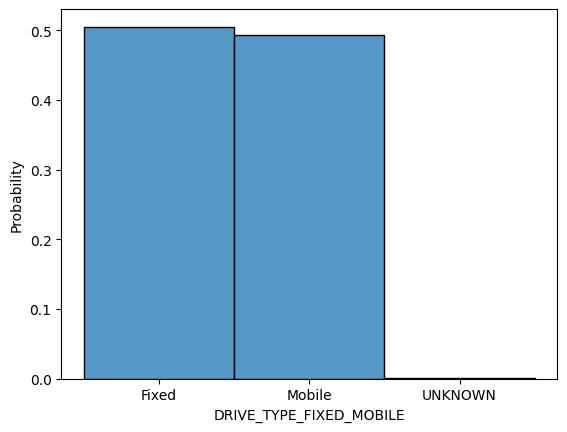

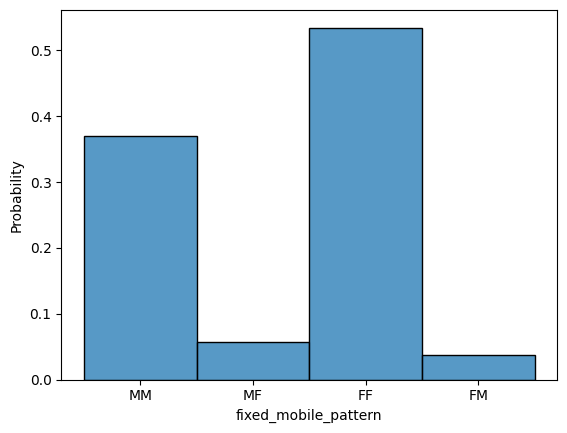

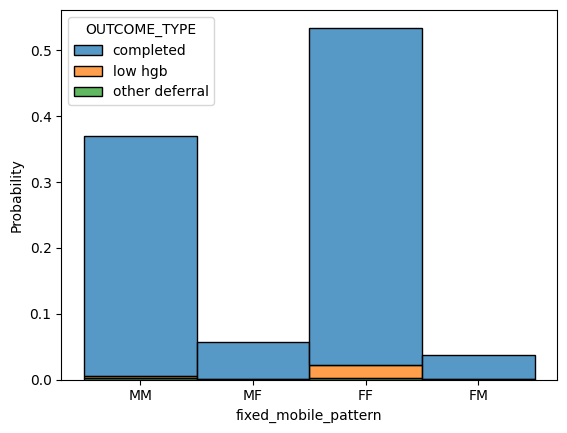

0.030672939893200746
0.009174705665599145
8030955
7875566


In [30]:
#Fixed-Mobile Donations Analysis

#plot number - mobile=0, fixed=1

sns.histplot(df, x="DRIVE_TYPE_FIXED_MOBILE", stat="probability")


df['Fixed_mobile'] = np.where(df["DRIVE_TYPE_FIXED_MOBILE"] == 'Fixed', 1, 0) #mobile is 0, fixed is 1
#sns.histplot(df, x="Fixed_mobile", stat="probability")

#create a column to indicate 
    #1. mobile then mobile - mm
    #2. mobile then fixed -mf
    #3. fixed then fixed - ff
    #4. fixed then mobile - fm

df["FIXED_NEXT"] = np.where((df['DONOR_KEY'] == df['DONOR_KEY'].shift(-1)), df['Fixed_mobile'].shift(-1), 10)
df.loc[((df['FIXED_NEXT']== 1) & (df['Fixed_mobile']== 1)), 'fixed_mobile_pattern'] = 'FF'

df.loc[((df['FIXED_NEXT']==0) & (df['Fixed_mobile']== 0)), 'fixed_mobile_pattern']= 'MM'

df.loc[((df['FIXED_NEXT']==0) & (df['Fixed_mobile']== 1)), 'fixed_mobile_pattern'] = 'FM'

df.loc[((df['FIXED_NEXT']==1) & (df['Fixed_mobile']== 0)), 'fixed_mobile_pattern']= 'MF'
df['fixed_mobile_pattern'].fillna('last', inplace=True)

df2 = df[df['fixed_mobile_pattern'] != 'last']

#Plot fixed pattern
#create value count
plt.figure()
sns.histplot(df2, x="fixed_mobile_pattern", stat="probability")
#sns.countplot(fixed_mobile)

# the % of each fixed mobile pattern resulting in hemoglobin deferral or other deferral
plt.figure()
i=sns.histplot(data=df2, x="fixed_mobile_pattern", hue="OUTCOME_TYPE", stat = 'probability',binwidth=1, multiple="stack")
#plt.legend(title='Fixed vs Mobile by Year', loc='upper left', labels=['Mobile', 'Fixed'])
plt.show(i)

# percent population fixed vs mobile by year
#plt.figure()
#sns.histplot(data=df, x="Visit_yr", hue="Fixed_mobile", binwidth=1)

# the % of each resulting in hemoglobin deferral or other deferral

print(len(df.loc[((df['OUTCOME_TYPE']=="low hgb") & (df['Fixed_mobile']== 1))])/len(df.loc[(df['Fixed_mobile']==1)]))
print(len(df.loc[((df['OUTCOME_TYPE']=="low hgb") & (df['Fixed_mobile']== 0))])/len(df.loc[(df['Fixed_mobile']==0)]))

print(len(df.loc[(df['Fixed_mobile']==1)]))
print(len(df.loc[(df['Fixed_mobile']==0)]))



In [31]:
# drop permamnent deferrals

df.drop(df[(df['DEFERRAL_DURATION'] == 99999.0)].index, inplace=True)

In [32]:
# drop non-whole blood and non-rbc don_procs
df.drop(df[(df['PHLEBOTOMY_GROUP'] != 'Whole Blood') & (df['PHLEBOTOMY_GROUP'] != 'RBCP')].index, inplace=True)
df.PHLEBOTOMY_GROUP.value_counts()

Whole Blood    11688368
RBCP             100204
Name: PHLEBOTOMY_GROUP, dtype: int64

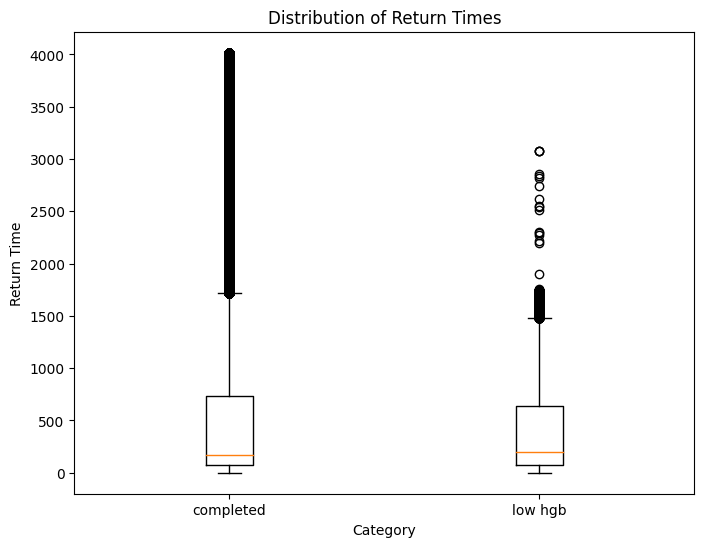

0


In [33]:
# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['OUTCOME_TYPE'] == 'completed']['time_to_return'],
             df[df['OUTCOME_TYPE'] == 'low hgb']['time_to_return']],
            labels=['completed', 'low hgb'])

plt.xlabel('Category')
plt.ylabel('Return Time')
plt.title('Distribution of Return Times')
plt.show()

df_end=df.loc[df['time_to_return'] <0]
print(len(df_end))



In [34]:
#df.loc[df.OUTCOME_TYPE == 'low hgb'].head(50)
#df.loc[df.DEFERRAL_DURATION>1000].head()

In [35]:
#compute time_to_return with shifts for completed donation: subtract 56 days 
df['time_to_return_wo'] = df['time_to_return']
df['time_to_return'] = np.where(df['OUTCOME_TYPE'] == 'completed', (df['time_to_return_wo'] - 56), df['time_to_return'])

#compute time_to_return with shifts for other donations
#subtract by DEFERRAL_DURATION fr deferrals

df['time_to_return'] = np.where(df['OUTCOME_TYPE'] != 'completed', (df['time_to_return_wo'] - df['DEFERRAL_DURATION']), df['time_to_return'])


df['time_to_return'].isna().sum()

0

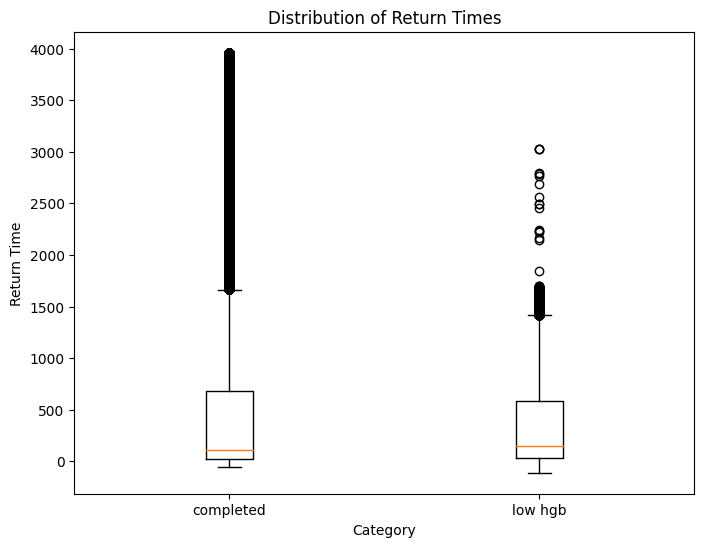

8946


In [36]:
# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['OUTCOME_TYPE'] == 'completed']['time_to_return'],
             df[df['OUTCOME_TYPE'] == 'low hgb']['time_to_return']],
            labels=['completed', 'low hgb'])

plt.xlabel('Category')
plt.ylabel('Return Time')
plt.title('Distribution of Return Times')
plt.show()

df_end=df.loc[df['time_to_return'] <-100]
print(len(df_end))
#df_end.head(50)

In [37]:
#df.loc[df.DONOR_KEY==594921.0].head()
#add column indicating year of donation
df['Year'] = df['Visit_Date'].dt.year  
#add first time
df['first_time']=np.where(df.ACTIVE_DONOR_TYPE=='First Time', 1,0)

df=df.drop(columns=['PHLEB_START_TIME_KEY','PHLEB_STOP_TIME_KEY', 'DONATION_BAG_DESCRIPTION', 'DONOR_GENDER','DONOR_ETHNICITY_DESC', 'DONOR_COUNTRY_OF_BIRTH', 
                    'DONOR_EDUCATION_DESC', 'COLLECTION_FIXED_LOCATION','COLLECTION_SITE_VALID_FLAG', 'BECS_ID', 'DRIVE_SETUP_TYPE','DEFERRAL_EVENT',
                    'DEFERRAL_INFORMATION','DEFERRAL_CREATE_DATE', 'DEFERRAL_START_DATE', 'DEFERRAL_STOP_DATE','DEF_INVALDATION_DATE','DEFERRAL_DESCRIPTION',
                    'DEFERRAL_VALID_CODE', 'DURATION_MODIF_TYPE','ALLOW_DISTRIBUTION'])


In [38]:
#write preprocessed data to csv
df.to_csv(("../1_data/private/preprocessed_data_Vitalant.csv"), index=False)